In [27]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from functools import partial
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration of the data

## Checks
First, we want to check if the nodes are not duplicated for each transport.

In [28]:
graphs,nodes,city_names = get_all_city_graph("data")

In [29]:
sum([graph.number_of_edges() for graph in graphs])

181722

In [30]:
nodes[0].head(10)

,name,city_center,city
stop_I,,,
1,Gawler Central Railway Station,0,adelaide
2,Gawler Oval Railway Station,0,adelaide
3,Gawler Railway Station,0,adelaide
4,Evanston Railway Station,0,adelaide
5,Tambelin Railway Station,0,adelaide
6,Kudla Railway Station,0,adelaide
7,Munno Para Railway Station,0,adelaide
8,Smithfield Railway Station,0,adelaide
9,Broadmeadows Railway Station,0,adelaide


In [33]:
final  = []
fcts = [ ("in_degree_distribution",nx.DiGraph.in_degree), ("out_degree_distribution",nx.DiGraph.out_degree), ("clustering", nx.clustering),("betweeness_centrality",partial(nx.betweenness_centrality,k=500)),("eigenvector_centrality",partial(nx.eigenvector_centrality,max_iter=500)), ("katz_centrality",nx.katz_centrality),("closeness_centrality",nx.closeness_centrality)]
for g, node in zip(graphs, nodes):
    di_graph_de_backup = nx.DiGraph()
    for u,v in g.edges():
        if di_graph_de_backup.has_edge(u,v):
            di_graph_de_backup[u][v]['weight'] += 1
        else:
            di_graph_de_backup.add_edge(u, v, weight=1)

    for attr, fct in fcts:
        try: 
            node = add_attribute_to_name(node, attr, fct,g)
        except:
            node = add_attribute_to_name(node, attr, fct, di_graph_de_backup)

        if attr == fcts[-1][0]:
            final.append(node)

in_degree_distribution
out_degree_distribution
clustering
C PETE
betweeness_centrality
C PETE
eigenvector_centrality
C PETE
katz_centrality
C PETE
closeness_centrality
in_degree_distribution
out_degree_distribution
clustering
C PETE
betweeness_centrality
eigenvector_centrality
C PETE
katz_centrality
C PETE
closeness_centrality
in_degree_distribution
out_degree_distribution
clustering
C PETE
betweeness_centrality
eigenvector_centrality
C PETE
katz_centrality
C PETE
closeness_centrality
in_degree_distribution
out_degree_distribution
clustering
C PETE
betweeness_centrality
eigenvector_centrality
C PETE
katz_centrality
C PETE
closeness_centrality
in_degree_distribution
out_degree_distribution
clustering
C PETE
betweeness_centrality
eigenvector_centrality
C PETE
katz_centrality
C PETE
closeness_centrality


In [10]:
final_all = pd.concat(final)
final_all.to_csv("all_metrics_multi_digraph.csv")

In [11]:
def plot_attributes(list_df, attribute_name, names,city_per_city=False,names_to_display=[]):
    def plot(df,title,ax=None):
        if ax is None:
            sns.kdeplot(df, x=attribute_name, hue="city_center",clip=(0.0, None),log_scale=(False,True))
            plt.title(title)
       
        else:
            #sns.kdeplot(df, x=attribute_name, hue="city_center",clip=(0.0, None),ax=ax,log_scale=(False,True))
            sns.histplot(df, x=attribute_name, hue="city_center",ax=ax,log_scale=(False,True),bins=50)
            ax.set_title(title)
        
        
    
    if city_per_city:
        fig, axs = plt.subplots(1,len(names_to_display),figsize=(15,5),sharey=True,sharex=False)
        cpt = 0
        for gdf,name in zip(list_df,names):
            if name in names_to_display:
                plot(gdf, name, axs[cpt])
                
                if cpt < 3:
                    axs[cpt].get_legend().remove()
                
                axs[cpt].set_ylabel("")
                axs[cpt].set_xlabel("")
                cpt += 1
        fig.supxlabel(attribute_name)
        fig.supylabel("Density")
        plt.suptitle("Distribution of "+attribute_name+" for different cities")
        plt.show()
    else:
        plot(pd.concat(list_df), "All cities")

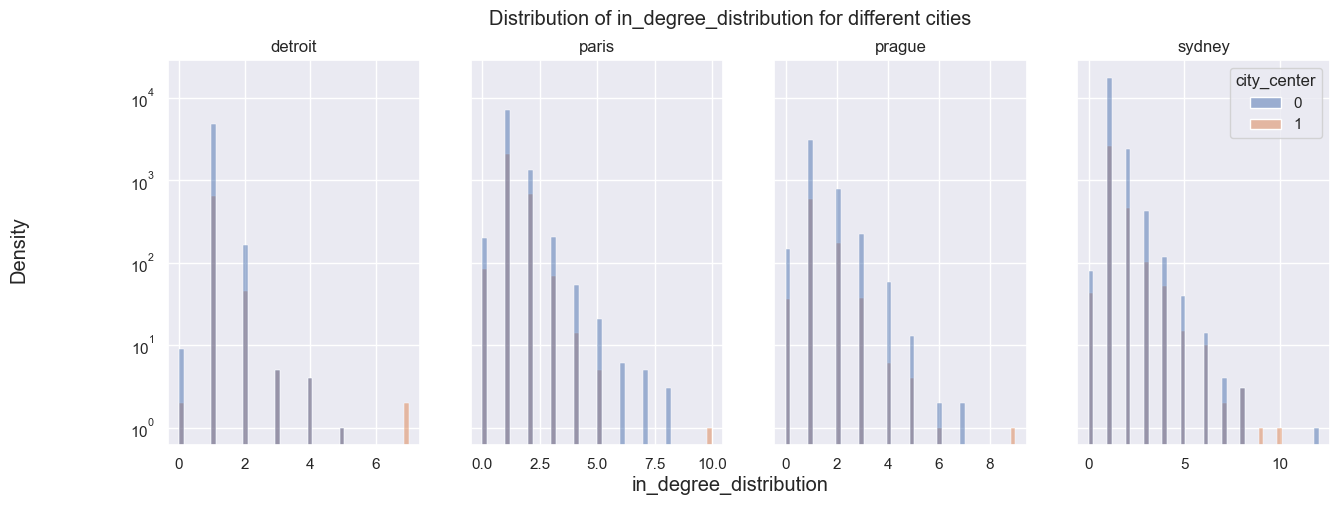

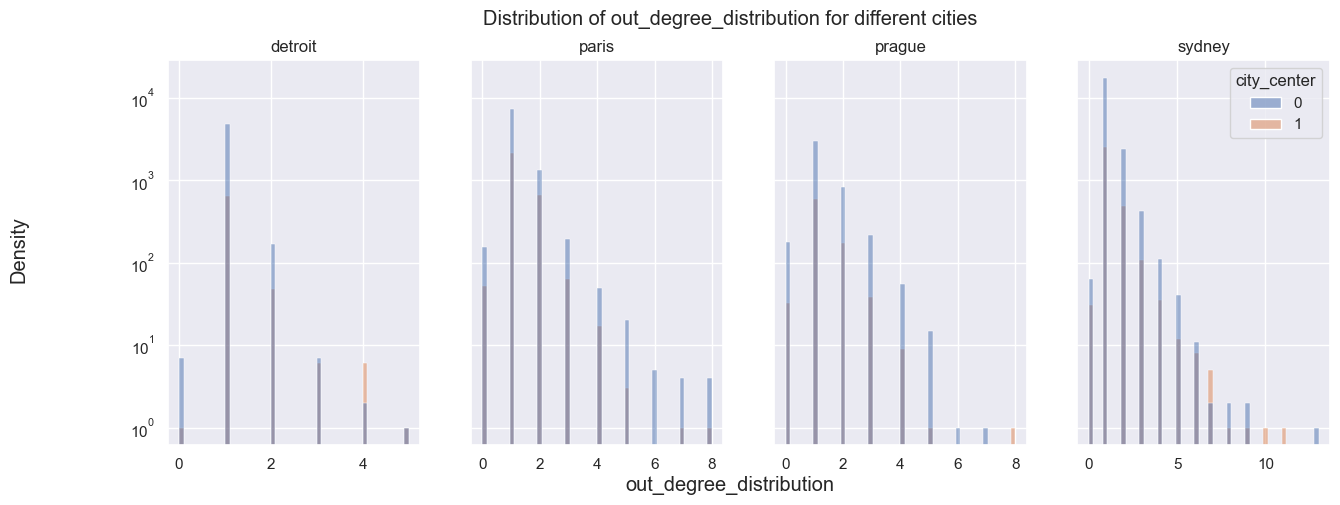

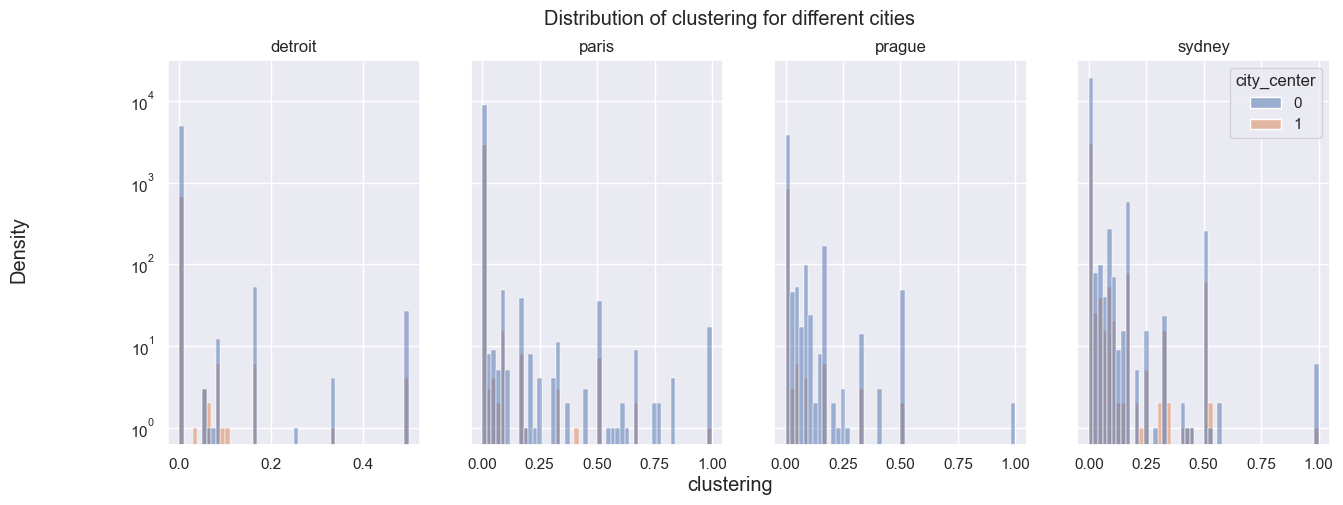

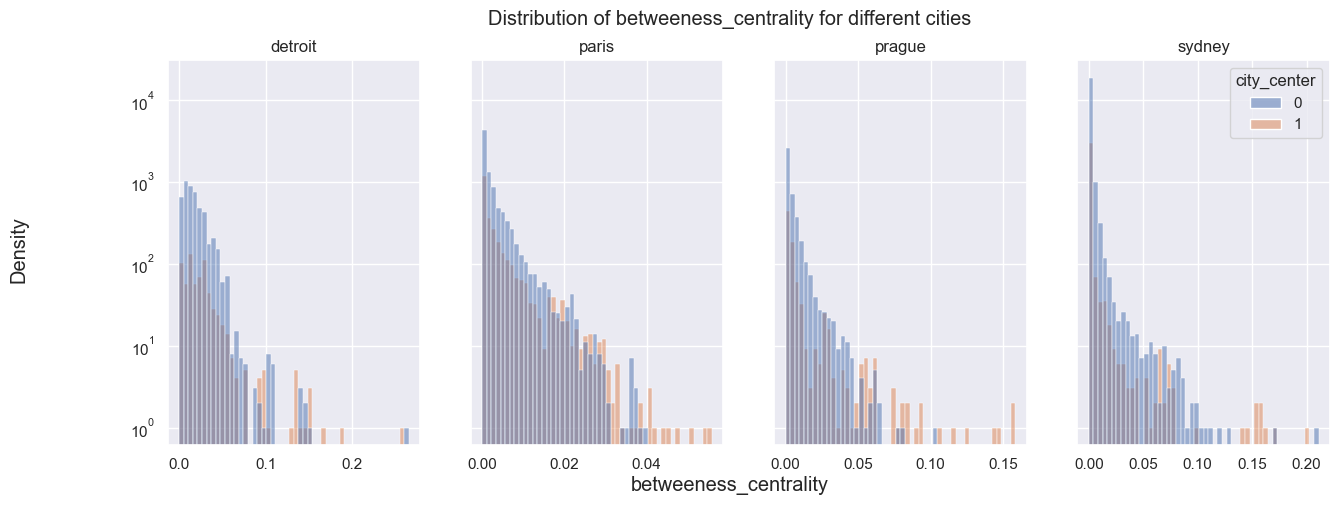

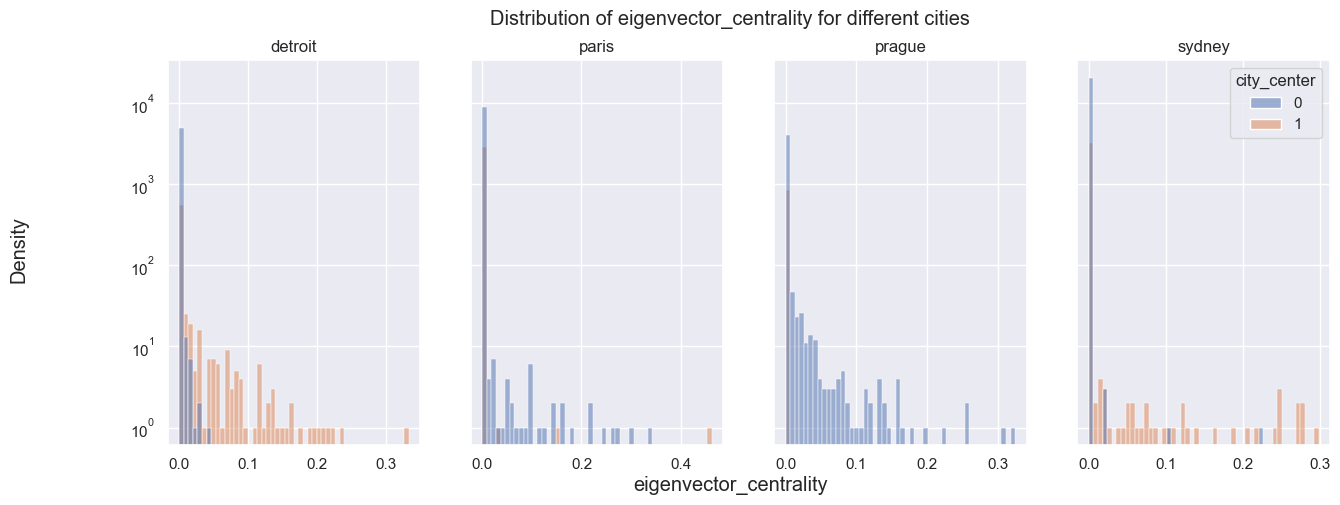

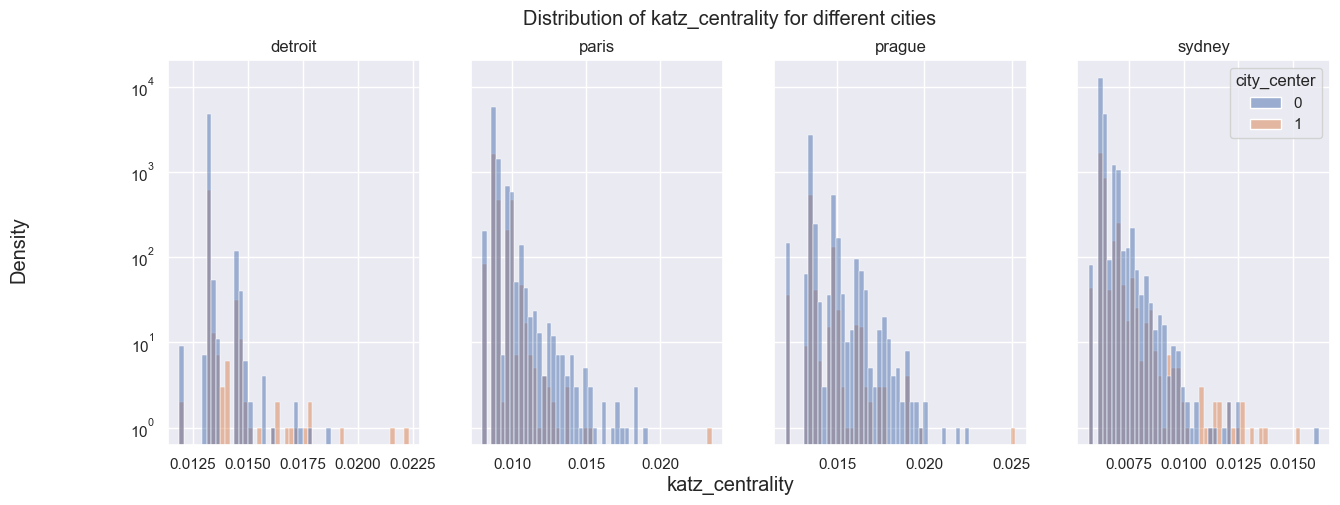

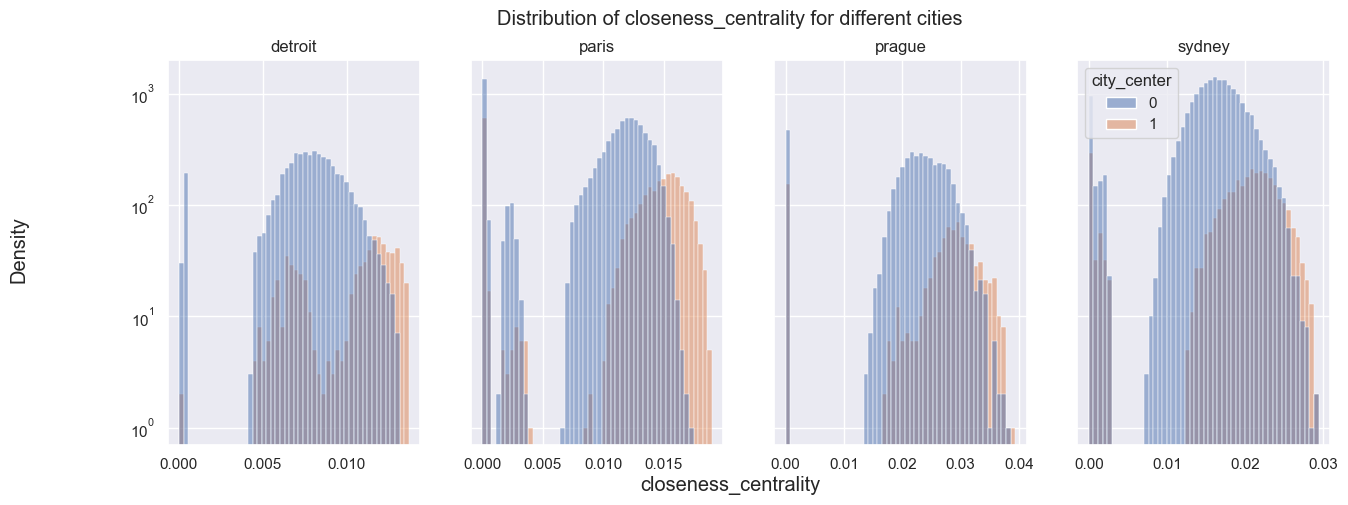

In [12]:
for name, _ in fcts:

    plot_attributes(final,name,city_names,city_per_city=True,names_to_display=["detroit", "paris", "prague", "sydney"])
